In [133]:
a = np.random.randint(0, 60, size=(500, 500), dtype=np.int64)

In [134]:
%timeit np.unique(a).size

11.7 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [135]:
%timeit faster_unique(a, 60)

589 µs ± 39.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [136]:
11.7e-3/589e-6

19.864176570458405

## Algorithm for identying interesting region of image
This is still not working perfectly.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
images = np.array([
    np.zeros((4,4)),
    np.ones((4,4)),
    np.linspace(0, 1, 16).reshape(4,4),
    np.tile(np.arange(0, 1, 0.25), (4, 1)),
    np.sum(np.ogrid[0:1:4j, 0:1:4j])/2,
    np.tile(np.array([0,0,1,1]), (4, 1)),
    np.random.random((4,4))])

In [92]:
for i, im in enumerate(images):
    print(i, im)

0 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
1 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
2 [[0.         0.06666667 0.13333333 0.2       ]
 [0.26666667 0.33333333 0.4        0.46666667]
 [0.53333333 0.6        0.66666667 0.73333333]
 [0.8        0.86666667 0.93333333 1.        ]]
3 [[0.   0.25 0.5  0.75]
 [0.   0.25 0.5  0.75]
 [0.   0.25 0.5  0.75]
 [0.   0.25 0.5  0.75]]
4 [[0.         0.16666667 0.33333333 0.5       ]
 [0.16666667 0.33333333 0.5        0.66666667]
 [0.33333333 0.5        0.66666667 0.83333333]
 [0.5        0.66666667 0.83333333 1.        ]]
5 [[0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]
6 [[0.80101095 0.65035495 0.89928981 0.15423918]
 [0.8000427  0.40891464 0.03001868 0.55854758]
 [0.40783813 0.62426619 0.22316077 0.26957658]
 [0.63190612 0.4040369  0.70741498 0.26093467]]


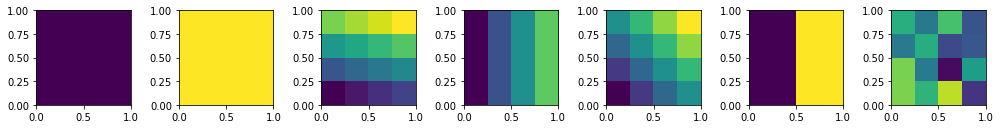

In [93]:
plot_kwargs = {'extent': (0, 1, 0, 1), 'origin':'lower', 'vmin':0, 'vmax':1}
fig, axes = plt.subplots(nrows=1, ncols=images.shape[0], figsize=(images.shape[0]*2, 2))
for image, ax in zip(images, axes):
    im = ax.imshow(image, **plot_kwargs)
fig.tight_layout()

In [126]:
def faster_unique(array: np.ndarray, max_val) -> np.int64:
    unique_vals = np.zeros(max_val, dtype=np.uint8)
    unique_vals[array.ravel()] = 1
    return unique_vals.sum()

def new_variance(array: np.ndarray) -> np.float64:
    vertical = np.diff(array, axis=0)
    horizontal = np.diff(array, axis=1)
    return faster_unique(vertical) + faster_unique(horizontal)

In [127]:
faster_unique(np.random.randint(0, 5000, size=(500, 500)), max_val=5000)

5000

In [122]:
5000%255

155

In [117]:
np.random.randint(0, 5000, size=(500, 500))

array([[3460, 1455,  649, ..., 3198, 3189, 2863],
       [4769,  682, 3463, ..., 2618, 2170,  519],
       [1428, 1345, 3385, ..., 3643, 4413, 3024],
       ...,
       [1870, 2759, 1893, ..., 2427, 4217, 3429],
       [3635, 3043, 4071, ..., 4290,  588, 2822],
       [4559, 3021,   80, ..., 4799, 1121,  426]])

In [99]:
# axis=1: left-right; axis=0: up-down
print(*[new_variance(im) for im in images], sep='\n')

2
2
7
2
8
3
24


In [22]:
np.diff(b, axis=0)

array([[-0.08281315,  0.84883792,  0.17287069,  0.58275441],
       [ 0.31580842, -0.86144437, -0.47014843, -0.31707098],
       [-0.3253609 ,  0.65501526,  0.53002356,  0.25371901]])

In [ ]:
c = np.arange(0, )